In [1]:
import pandas as pd
from matplotlib import pyplot

In [2]:
df=pd.read_excel("KAtracecovid date count .xlsx")

In [3]:
df.head()
df.tail(30)

,date,count
105,2020-06-22,249
106,2020-06-23,322
107,2020-06-24,397
108,2020-06-25,442
109,2020-06-26,445
110,2020-06-27,918
111,2020-06-28,1267
112,2020-06-29,1105
113,2020-06-30,947
114,2020-07-01,1272


In [4]:
train_data=df.iloc[0:125,1]
train_data
test_data=df.iloc[125:135,1]
test_data

125    2627
126    2738
127    2501
128    3178
129    4169
130    3685
131    4537
132    4120
133    3648
134    3649
Name: count, dtype: int64

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [6]:
def prepare_data(data, n_steps):
    X, y =[],[]
    for i in range(len(data)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(data)-1:
            break
            # gather input and output parts of the pattern
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [7]:
train_data
n_steps = 10
X, y = prepare_data(train_data, n_steps)



In [8]:
print(X),print(y)
len(y)

[[   1    2    1 ...    0    4    3]
 [   2    1    1 ...    4    3    1]
 [   1    1    1 ...    3    1    0]
 ...
 [1105  947 1272 ... 1843 1498 2062]
 [ 947 1272 1502 ... 1498 2062 2228]
 [1272 1502 1694 ... 2062 2228 2313]]
[   1    0    5    5    8    8   10    4    9   12    7    5   13    9
   14    4   16    7   12   12    6   16   10    8   17   15   13   19
   36   44   25    6   18   10    9   18   29   26    3    9   11   11
   31   24   12   13   37   22   20   12   48   41   54   14   63   34
   28   69   36   55   99  149   67  143  138  216  130   93  101  135
  115  248  141  299  187  388  267  257  515  378  239  308  161  120
  204  271  308  176  213  317  204  210  337  416  453  249  322  397
  442  445  918 1267 1105  947 1272 1502 1694 1839 1925 1843 1498 2062
 2228 2313 2798]


115

In [9]:
X.shape

(115, 10)

In [10]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [11]:
X.shape

(115, 10, 1)

### Building LSTM Model

Epoch 1/1000
4/4 [==============================] - 7s 34ms/step - loss: 272736.0875
Epoch 2/1000
4/4 [==============================] - 0s 12ms/step - loss: 299900.9000
Epoch 3/1000
4/4 [==============================] - 0s 15ms/step - loss: 254579.7406
Epoch 4/1000
4/4 [==============================] - 0s 11ms/step - loss: 200385.6406
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 154021.1594
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 185733.7000
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 160435.6875
Epoch 8/1000
4/4 [==============================] - 0s 12ms/step - loss: 83587.1484
Epoch 9/1000
4/4 [==============================] - 0s 12ms/step - loss: 53553.3625
Epoch 10/1000
4/4 [==============================] - 0s 10ms/step - loss: 52818.6477
Epoch 11/1000
4/4 [==============================] - 0s 15ms/step - loss: 51252.6762
Epoch 12/1000
4/4 [==============================] - 0s 12ms/step -

4/4 [==============================] - 0s 10ms/step - loss: 29488.2078
Epoch 194/1000
4/4 [==============================] - 0s 12ms/step - loss: 66321.5320
Epoch 195/1000
4/4 [==============================] - 0s 10ms/step - loss: 93484.1141
Epoch 196/1000
4/4 [==============================] - 0s 14ms/step - loss: 70675.8703
Epoch 197/1000
4/4 [==============================] - 0s 13ms/step - loss: 43231.4777
Epoch 198/1000
4/4 [==============================] - 0s 12ms/step - loss: 55637.9480
Epoch 199/1000
4/4 [==============================] - 0s 14ms/step - loss: 35375.4180
Epoch 200/1000
4/4 [==============================] - 0s 11ms/step - loss: 41594.8828
Epoch 201/1000
4/4 [==============================] - 0s 11ms/step - loss: 51235.2203
Epoch 202/1000
4/4 [==============================] - 0s 14ms/step - loss: 39754.2781
Epoch 203/1000
4/4 [==============================] - 0s 12ms/step - loss: 32128.4793
Epoch 204/1000
4/4 [==============================] - 0s 14ms/step - 

4/4 [==============================] - 0s 11ms/step - loss: 20051.1520
Epoch 384/1000
4/4 [==============================] - 0s 12ms/step - loss: 17485.0648
Epoch 385/1000
4/4 [==============================] - 0s 10ms/step - loss: 30287.3871
Epoch 386/1000
4/4 [==============================] - 0s 11ms/step - loss: 20504.3854
Epoch 387/1000
4/4 [==============================] - 0s 13ms/step - loss: 15296.2727
Epoch 388/1000
4/4 [==============================] - 0s 13ms/step - loss: 15150.4037
Epoch 389/1000
4/4 [==============================] - 0s 12ms/step - loss: 28189.0777
Epoch 390/1000
4/4 [==============================] - 0s 13ms/step - loss: 22513.1934
Epoch 391/1000
4/4 [==============================] - 0s 10ms/step - loss: 20090.8254
Epoch 392/1000
4/4 [==============================] - 0s 11ms/step - loss: 16145.2480
Epoch 393/1000
4/4 [==============================] - 0s 13ms/step - loss: 18350.4102
Epoch 394/1000
4/4 [==============================] - 0s 10ms/step - 

4/4 [==============================] - 0s 11ms/step - loss: 9518.0824
Epoch 574/1000
4/4 [==============================] - 0s 11ms/step - loss: 7285.2361
Epoch 575/1000
4/4 [==============================] - 0s 11ms/step - loss: 8178.8872
Epoch 576/1000
4/4 [==============================] - 0s 12ms/step - loss: 9444.2799
Epoch 577/1000
4/4 [==============================] - 0s 11ms/step - loss: 9849.1344
Epoch 578/1000
4/4 [==============================] - 0s 10ms/step - loss: 11488.0061
Epoch 579/1000
4/4 [==============================] - 0s 10ms/step - loss: 20012.5277
Epoch 580/1000
4/4 [==============================] - 0s 11ms/step - loss: 17126.8086
Epoch 581/1000
4/4 [==============================] - 0s 11ms/step - loss: 10534.7609
Epoch 582/1000
4/4 [==============================] - 0s 11ms/step - loss: 13568.0762
Epoch 583/1000
4/4 [==============================] - 0s 11ms/step - loss: 13049.0137
Epoch 584/1000
4/4 [==============================] - 0s 11ms/step - loss:

4/4 [==============================] - 0s 11ms/step - loss: 10675.2675
Epoch 764/1000
4/4 [==============================] - 0s 11ms/step - loss: 14575.6715
Epoch 765/1000
4/4 [==============================] - 0s 13ms/step - loss: 16646.6582
Epoch 766/1000
4/4 [==============================] - 0s 11ms/step - loss: 15856.2988
Epoch 767/1000
4/4 [==============================] - 0s 11ms/step - loss: 15926.3830
Epoch 768/1000
4/4 [==============================] - 0s 11ms/step - loss: 13694.1873
Epoch 769/1000
4/4 [==============================] - 0s 11ms/step - loss: 11379.3621
Epoch 770/1000
4/4 [==============================] - 0s 14ms/step - loss: 13198.2082
Epoch 771/1000
4/4 [==============================] - 0s 11ms/step - loss: 12597.0322
Epoch 772/1000
4/4 [==============================] - 0s 13ms/step - loss: 13723.9928
Epoch 773/1000
4/4 [==============================] - 0s 12ms/step - loss: 12076.9260
Epoch 774/1000
4/4 [==============================] - 0s 14ms/step - 

4/4 [==============================] - 0s 15ms/step - loss: 8371.5497
Epoch 954/1000
4/4 [==============================] - 0s 15ms/step - loss: 11257.6387
Epoch 955/1000
4/4 [==============================] - 0s 15ms/step - loss: 8872.6316
Epoch 956/1000
4/4 [==============================] - 0s 13ms/step - loss: 7734.5856
Epoch 957/1000
4/4 [==============================] - 0s 14ms/step - loss: 9464.5764
Epoch 958/1000
4/4 [==============================] - 0s 11ms/step - loss: 9526.6119
Epoch 959/1000
4/4 [==============================] - 0s 11ms/step - loss: 8276.6104
Epoch 960/1000
4/4 [==============================] - 0s 13ms/step - loss: 8967.4322
Epoch 961/1000
4/4 [==============================] - 0s 13ms/step - loss: 8287.2511
Epoch 962/1000
4/4 [==============================] - 0s 11ms/step - loss: 10346.6623
Epoch 963/1000
4/4 [==============================] - 0s 13ms/step - loss: 9043.1381
Epoch 964/1000
4/4 [==============================] - 0s 14ms/step - loss: 103

Text(0, 0.5, 'loss')

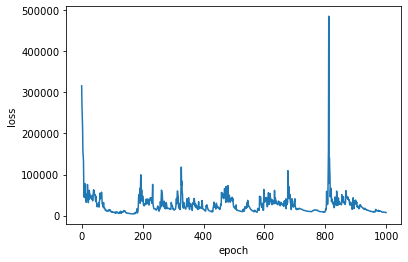

In [12]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
history = model.fit(X, y, epochs=1000, verbose=1)
pyplot.plot(history.history['loss'])
pyplot.xlabel('epoch')
pyplot.ylabel('loss')


### Predicting For the next 10 data

In [13]:

last10=train_data.iloc[-11:-1]
len(last10)



10

In [25]:

x_input = np.array(last10)
temp_input=list(x_input)
pred_data=[]
i=0
while(i<10):
    
    if(len(temp_input)>10):
        x_input=np.array(temp_input[1:])
        
  
        x_input = x_input.reshape((1, n_steps, n_features))
      
        yhat = model.predict(x_input, verbose=0)

        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
     
        pred_data.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
      #  print(yhat[0])
        temp_input.append(yhat[0][0])
        pred_data.append(yhat[0][0])
        i=i+1
    

print(pred_data)

[2899.935, 2905.398, 3589.3916, 3150.5864, 3224.8071, 3797.8047, 3802.7488, 4124.311, 4714.0044, 4219.94]


In [15]:
len(train_data)

125

In [16]:
pred_data

[2899.935,
 2905.398,
 3589.3916,
 3150.5864,
 3224.8071,
 3797.8047,
 3802.7488,
 4124.311,
 4714.0044,
 4219.94]

In [17]:
len(pred_data)

10

### Visualizaing The Output

In [18]:
import matplotlib.pyplot as plt

In [19]:
day_new=np.arange(1,126)
day_pred=np.arange(126,136)
day_act=np.arange(126,136)



In [20]:
day_new
test_data
day_act

array([126, 127, 128, 129, 130, 131, 132, 133, 134, 135])

Text(0, 0.5, 'patients')

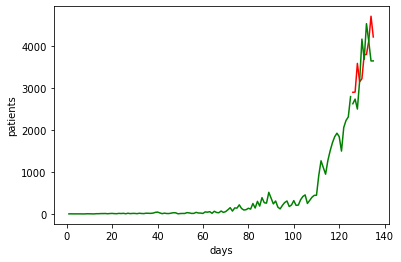

In [21]:
plt.plot(day_new,train_data,color="g")
plt.plot(day_pred,pred_data,color="r")
plt.plot(day_act,test_data,color="g")
pyplot.xlabel('days')
pyplot.ylabel('patients')


In [22]:
print(test_data)

125    2627
126    2738
127    2501
128    3178
129    4169
130    3685
131    4537
132    4120
133    3648
134    3649
Name: count, dtype: int64


In [23]:
#print(test_data)
#print(pred_data)
diff=test_data-pred_data

abs_diff=abs(diff)
MAPE = np.mean(abs_diff/test_data)*100
MAPE

14.774983375753283

In [24]:
print(test_data)
print(pred_data)

125    2627
126    2738
127    2501
128    3178
129    4169
130    3685
131    4537
132    4120
133    3648
134    3649
Name: count, dtype: int64
[2899.935, 2905.398, 3589.3916, 3150.5864, 3224.8071, 3797.8047, 3802.7488, 4124.311, 4714.0044, 4219.94]


##### Code Refered from krish naik github link

<a href="https://github.com/krishnaik06/Time-Series-Forecasting/blob/master/UnivariateTimeSeries.ipynb">Click here for LSTM model Code</a><br>